In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

%matplotlib inline
plt.style.use('seaborn')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Upload DATA
train_set = pd.read_csv('drive/My Drive/DATA/titanic/train.csv')
test_set = pd.read_csv('drive/My Drive/DATA/titanic/test.csv')
test_labels = pd.read_csv('drive/My Drive/DATA/titanic/gender_submission.csv')

**Look for datatype info and non-null**

In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
report = pandas_profiling.ProfileReport(train_set)
report.to_file("report_train_set.html")

In [6]:
matrix_corr = train_set.corr()
matrix_corr['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [7]:
matrix_corr.style.background_gradient(cmap='coolwarm', axis=None)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1,-0.00500666,-0.035144,0.0368472,-0.0575268,-0.00165201,0.0126582
Survived,-0.00500666,1,-0.338481,-0.0772211,-0.0353225,0.0816294,0.257307
Pclass,-0.035144,-0.338481,1,-0.369226,0.0830814,0.0184427,-0.5495
Age,0.0368472,-0.0772211,-0.369226,1,-0.308247,-0.189119,0.0960667
SibSp,-0.0575268,-0.0353225,0.0830814,-0.308247,1,0.414838,0.159651
Parch,-0.00165201,0.0816294,0.0184427,-0.189119,0.414838,1,0.216225
Fare,0.0126582,0.257307,-0.5495,0.0960667,0.159651,0.216225,1


In [8]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


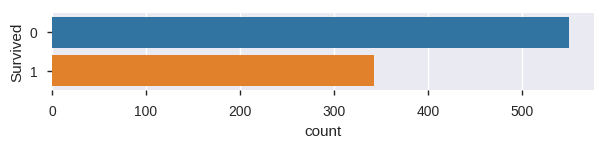

In [9]:
fig = plt.figure(figsize=(7, 1))
sns.countplot(y='Survived', data=train_set)

##PClass

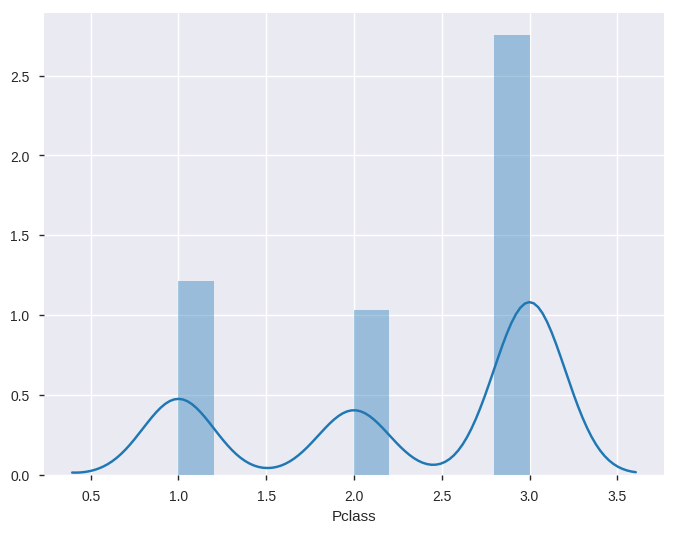

In [10]:
fig = plt.figure(figsize=(8, 6))
sns.distplot(train_set['Pclass'])

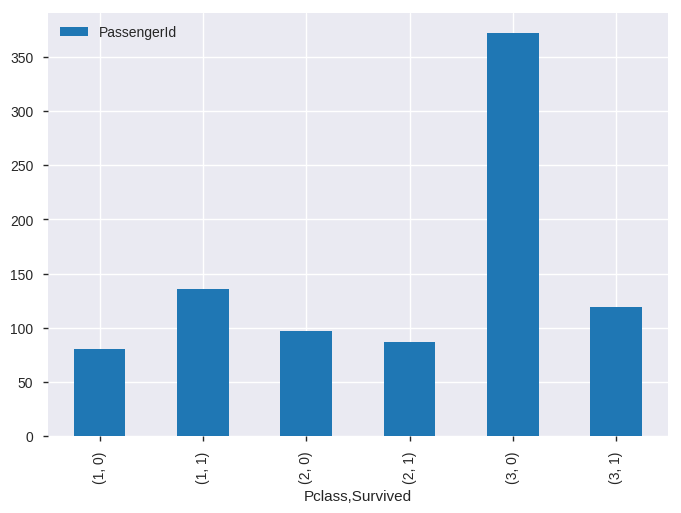

In [11]:
# Bar (class, Survived)
data_plot = train_set.groupby(['Pclass', 'Survived']).count()
data_plot[['PassengerId']].plot(kind='bar')

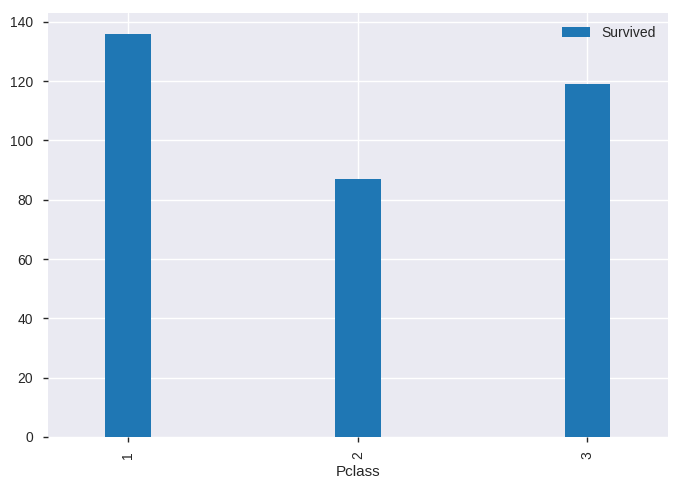

In [12]:
data = train_set[['Pclass', 'Survived']].groupby('Pclass', axis=0).sum()

data.plot(kind='bar', width=0.2)

##Sex


In [13]:
sex_set = train_set[['Sex', 'Survived']].head()
sex_set[sex_set=='female'].sum()['Survived']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0.0

[Text(0, 0, 'Male'), Text(0, 0, 'Female')]

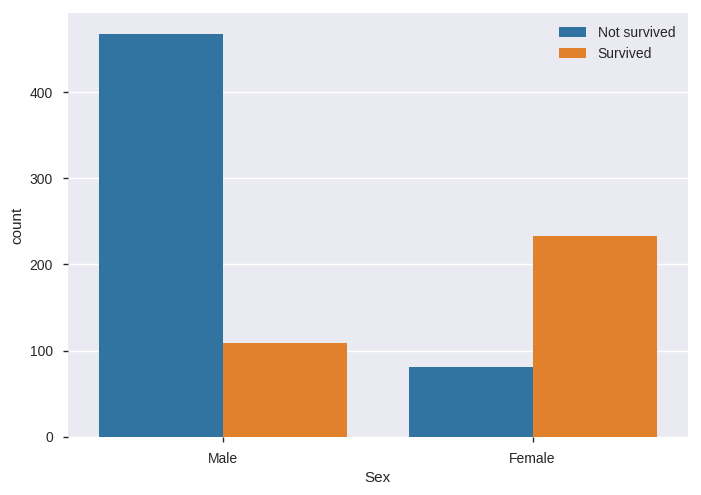

In [14]:
x = train_set['Sex']
y = train_set['Survived']


fig = sns.countplot(x='Sex', hue='Survived', data=train_set)
fig.legend(['Not survived', 'Survived'])
fig.set_xticklabels(['Male', 'Female'])

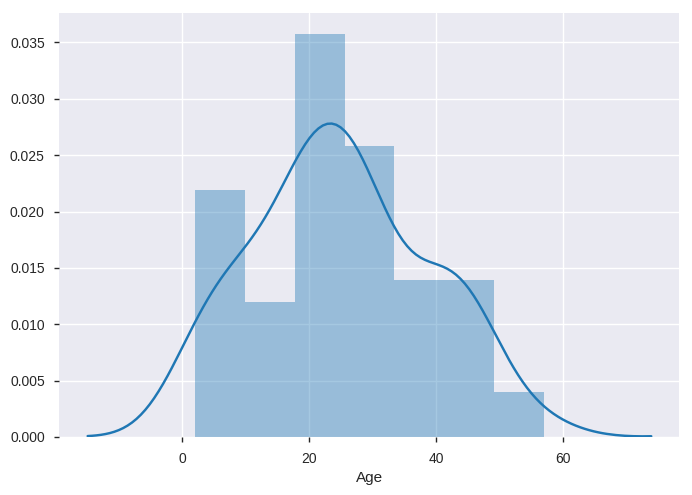

In [15]:
female_set = train_set[train_set['Sex']=='female']
male_set = train_set[train_set['Sex']=='male']
figure, ax = plt.subplots(1, 1)

#female_set.plot(kind='hist', x='Survived', y='Age', bins=20, alpha=0.3, ax=ax, label='female')
#male_set.plot(kind='hist', x='Survived', y='Age', bins=20, alpha=0.2, ax=ax, label='male')

fig = sns.distplot(female_set[female_set['Survived']==0]['Age'].dropna(), ax=ax)

##Age

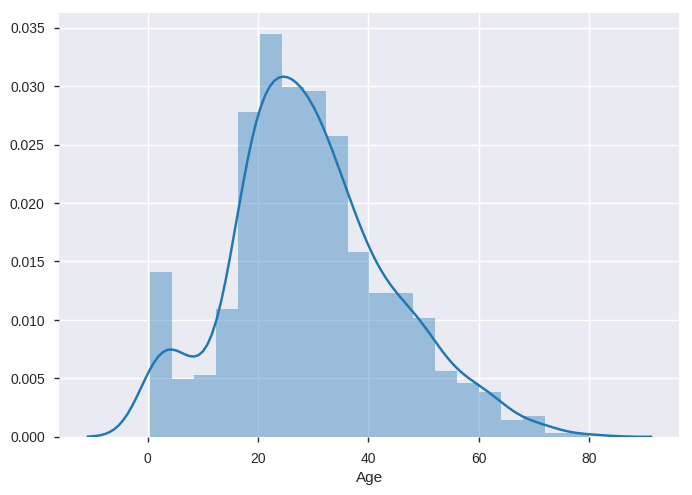

In [16]:
sns.distplot(train_set['Age'].dropna())

##SibSp

   SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5


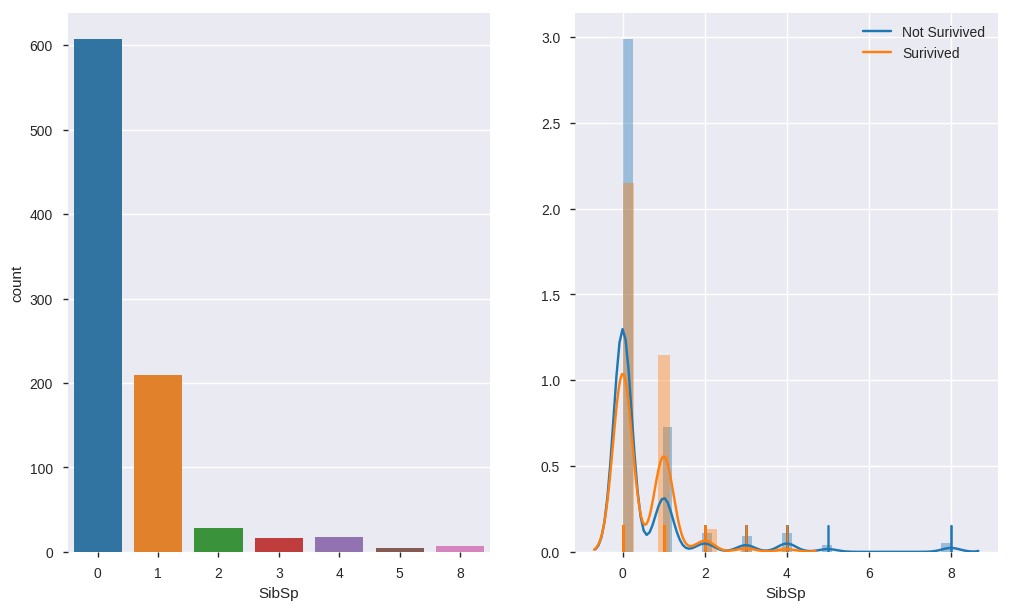

In [17]:
print(train_set['SibSp'].value_counts().to_frame())
fig = plt.figure(figsize=(12, 7))
plt.subplot(121)
sns.countplot(x='SibSp', data=train_set)
plt.subplot(122)
sns.distplot(train_set.loc[train_set['Survived']==0]['SibSp'], rug=True, kde_kws={'label': 'Not Surivived'})
sns.distplot(train_set.loc[train_set['Survived']==1]['SibSp'], rug=True, kde_kws={'label': 'Surivived'})

In [18]:
pd.pivot_table(train_set, values='Survived', index='SibSp', columns=train_set['Survived'], aggfunc='count', fill_value=0)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


##Parch

,Parch
0,678
1,118
2,80
5,5
3,5
4,4
6,1


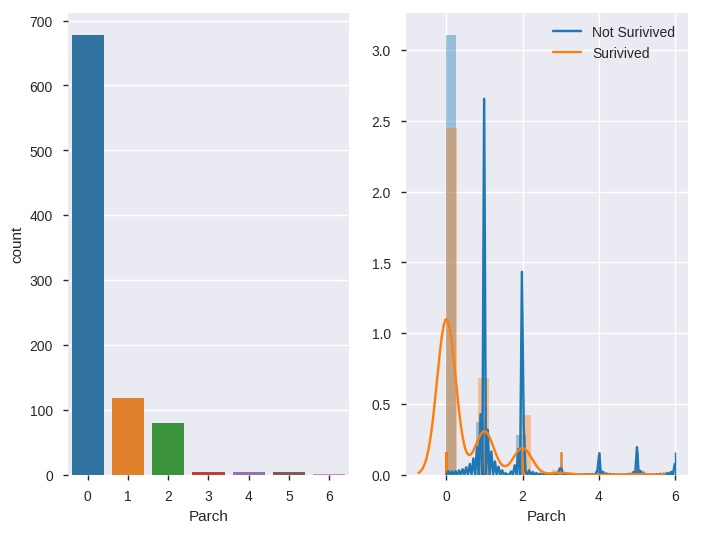

In [19]:
fig = plt.figure(figsize=(8, 6))
plt.subplot(121)
sns.countplot(x='Parch', data=train_set)
plt.subplot(122)
sns.distplot(train_set.loc[train_set['Survived']==0]['Parch'], rug=True, kde_kws={'label': 'Not Surivived'})
sns.distplot(train_set.loc[train_set['Survived']==1]['Parch'], rug=True, kde_kws={'label': 'Surivived'})

train_set['Parch'].value_counts().to_frame()

Survived,0,1
Parch,,
0,65.63,34.37
1,44.92,55.08
2,50.00,50.00
3,40.00,60.00
4,100.00,0.00
5,80.00,20.00
6,100.00,0.00


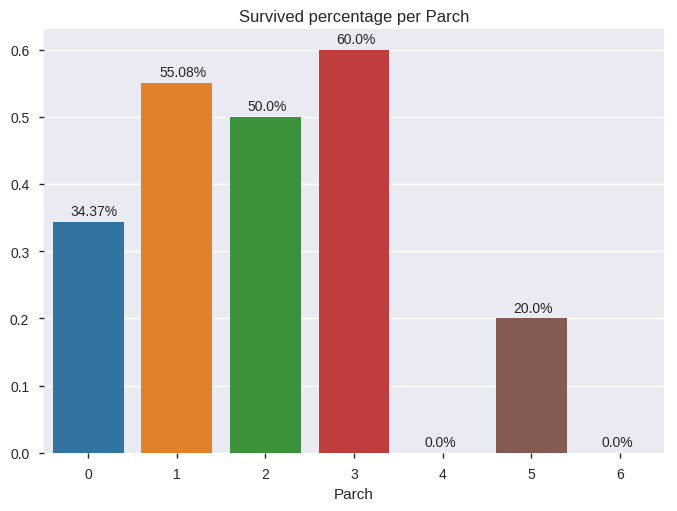

In [20]:
parch_table = pd.pivot_table(train_set, columns=train_set['Survived'], index='Parch', values='Survived', aggfunc='count', fill_value=0)
parch_table['Total'] = parch_table[0] + parch_table[1]
parch_table = parch_table[[0, 1]].div(parch_table['Total'], axis=0)

fig, ax = plt.subplots(1, 1)
ax.set_title("Survived percentage per Parch")
sns.barplot(data=parch_table[[1]].T)

for i, p in enumerate(ax.patches):
    height = p.get_height()
    width = p.get_width()
    ax.text(p.get_x() + width / 4, height + 0.01, f"{round(parch_table[1][i] * 100, 2)}%") 

(parch_table * 100).round(decimals=2)

##Ticket

In [21]:
train_set['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [22]:
train_set['Ticket'].value_counts().to_frame().head(10)

,Ticket
1601,7
CA. 2343,7
347082,7
CA 2144,6
3101295,6
347088,6
S.O.C. 14879,5
382652,5
2666,4
19950,4


##Cabin

In [23]:
train_set['Cabin'].isnull().value_counts()
# True: 'Missing value'
# False: 'Not Missing value'

True     687
False    204
Name: Cabin, dtype: int64

##Fare

In [24]:
train_set['Fare'].dtype

dtype('float64')

In [25]:
cat_fare_set = train_set.copy()
cat_fare_set['Cat_fare'] = pd.cut(train_set['Fare'], bins=3)
cat_fare_set[['Survived', 'Cat_fare']].head()

,Survived,Cat_fare
0,0,"(-0.512, 170.776]"
1,1,"(-0.512, 170.776]"
2,1,"(-0.512, 170.776]"
3,1,"(-0.512, 170.776]"
4,0,"(-0.512, 170.776]"


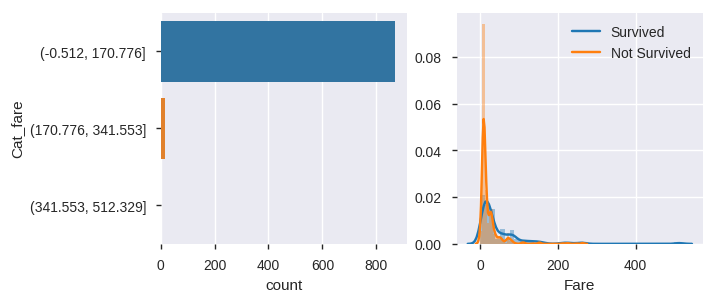

In [26]:
survived = train_set.loc[train_set['Survived']==1]['Fare']
not_survived = train_set.loc[train_set['Survived']==0]['Fare']

fig = plt.figure(figsize=(7, 3))
plt.subplot(121)
sns.countplot(data=cat_fare_set, y='Cat_fare')
plt.subplot(122)
sns.distplot(survived, kde_kws={'label': 'Survived'})
sns.distplot(not_survived, kde_kws={'label': 'Not Survived'})

##Embarked

**Look up for missing values**

In [42]:
train_set['Embarked'].isnull().sum()

2

**Count values for each category**

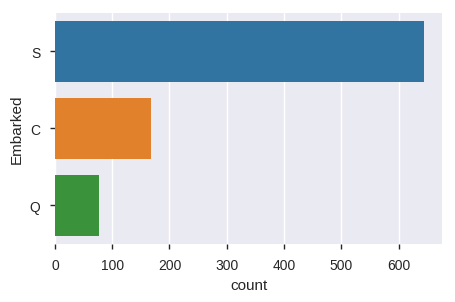

In [45]:
fig = plt.figure(figsize=(5, 3))
sns.countplot(data=train_set, y='Embarked')

**Pivot table with aggfunc='count' >> How many survived for each category**


In [91]:
embarked_pt = pd.pivot_table(train_set, values='Survived', index='Embarked', columns=train_set['Survived'], aggfunc='count')
embarked_pt['Total'] = embarked_pt[0] + embarked_pt[1]
embarked_pt

Survived,0,1,Total
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644


In [92]:
# Percentage
embarked_pt = embarked_pt[[0, 1]].div(embarked_pt['Total'], axis=0).round(4) * 100
embarked_pt

Survived,0,1
Embarked,,
C,44.64,55.36
Q,61.04,38.96
S,66.30,33.70


In [97]:
embarked_pt[1][0]

55.36

In [95]:
per_embarked = embarked_pt.reset_index()
per_embarked.columns = ['Embarked', '0', '1']
per_embarked.columns

Index(['Embarked', '0', '1'], dtype='object')

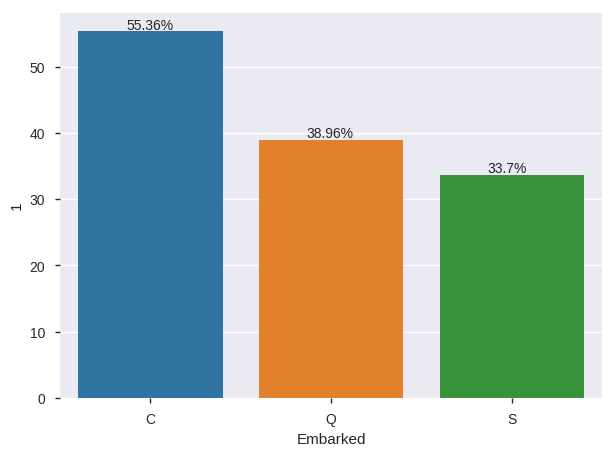

In [107]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
sns.barplot(data=per_embarked, x='Embarked', y='1')
for i, p in enumerate(ax.patches):
  height = p.get_height()
  width = p.get_width()
  x, y = p.get_xy()
  ax.text(x + width / 3, height + 0.3, f"{embarked_pt[1][i]}%")

**Is there a correlation between Embarked categories and 'Pclass', 'Survived', 'Fare'?**

In [0]:
C_embarked = train_set[train_set['Embarked']=='C'][['Embarked', 'Pclass', 'Survived', 'Fare']]
Q_embarked = train_set[train_set['Embarked']=='Q'][['Embarked', 'Pclass', 'Survived', 'Fare']]
S_embarked = train_set[train_set['Embarked']=='S'][['Embarked', 'Pclass', 'Survived', 'Fare']]

let s look some statistics analysis

In [118]:
train_set[['Embarked', 'Pclass', 'Survived', 'Fare']].groupby(by='Embarked').mean()

,Pclass,Survived,Fare
Embarked,,,
C,1.886905,0.553571,59.954144
Q,2.909091,0.389610,13.276030
S,2.350932,0.336957,27.079812


In [120]:
train_set[['Embarked', 'Pclass', 'Survived', 'Fare']].groupby(by='Embarked').describe().T

Embarked                 C          Q           S
Pclass   count  168.000000  77.000000  644.000000
         mean     1.886905   2.909091    2.350932
         std      0.944100   0.369274    0.789402
         min      1.000000   1.000000    1.000000
         25%      1.000000   3.000000    2.000000
         50%      1.000000   3.000000    3.000000
         75%      3.000000   3.000000    3.000000
         max      3.000000   3.000000    3.000000
Survived count  168.000000  77.000000  644.000000
         mean     0.553571   0.389610    0.336957
         std      0.498608   0.490860    0.473037
         min      0.000000   0.000000    0.000000
         25%      0.000000   0.000000    0.000000
         50%      1.000000   0.000000    0.000000
         75%      1.000000   1.000000    1.000000
         max      1.000000   1.000000    1.000000
Fare     count  168.000000  77.000000  644.000000
         mean    59.954144  13.276030   27.079812
         std     83.912994  14.188047   35.887993
         min      4.012500   6.750000    0.000000
         25%     13.697950   7.750000    8.050000
         50%     29.700000   7.750000   13.000000
         75%     78.500025  15.500000   27.900000
         max    512.329200  90.000000  263.000000

###Attributes to use in the ML model



In [121]:
train_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']**

##Conclusion

* Pclass: It is more likely to survive if the passenger have a better class
* Sex: The percentage ratio between Female survivals is greater than Male
* Age: Younger people tend to have a better ratio for suvival
